## Info-theoretic for Wulf

# Stochastic Process Simulation

The Set-Up code has been borrowed from https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

Import Dependencies

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import plotly.graph_objs as go
from collections import namedtuple, deque
import math
import random
# if GPU is to be used.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%matplotlib inline

Parameters for our model

In [10]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

Simulation parameters

In [11]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

Re-normalized variables (to avoid recomputing these constants at every time step)

In [12]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

Create a vector that will contain all successive values of our process during the simulation

In [13]:
x = np.zeros(n)

 Euler-Maruyama method

In [14]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

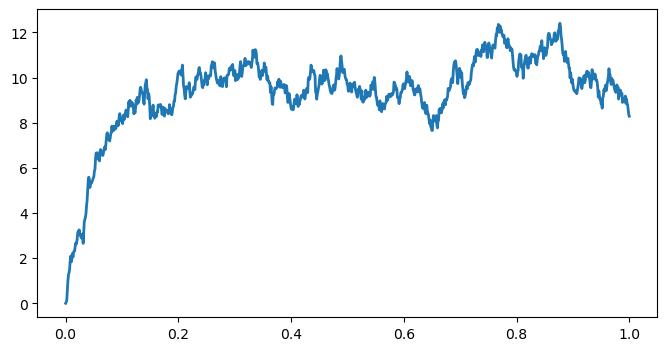

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

Langevin Equation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


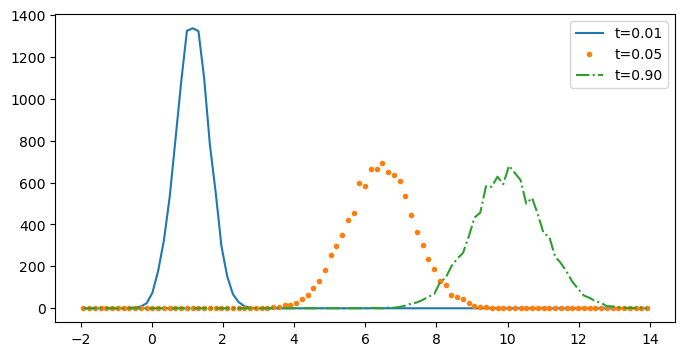

In [16]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

# Projectile Simulation
code at https://cocalc.com/share/public_paths/223c4e9ca1b913a9fa9d1d0f1028d90b7dc0b2d2

Model Parameters

In [17]:
# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

80 60.0


Check Parameter

In [18]:
# Set up the lists to store variables
# Start by putting the initial velocities at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]

# Drag force
drag = Cd*V**2                      # drag force

# Create the lists for acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M]
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

# Print out some values to check
print(ax[0])
print(ay[0])
print(vx[0])
print(vy[0])

-16.000000000000004
-37.51281292110204
40.00000000000001
69.28203230275508


Velocity Update

t= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
vx= [40.00000000000001, 32.00000000000001, 27.528951416567008, 24.787883378136915, 23.02339491459251, 21.846818145611152, 21.027776019653995, 20.413445666052425, 19.89116281938412, 19.368416481078107, 18.760291921319446]


Text(0.5, 0, 'time (s)')

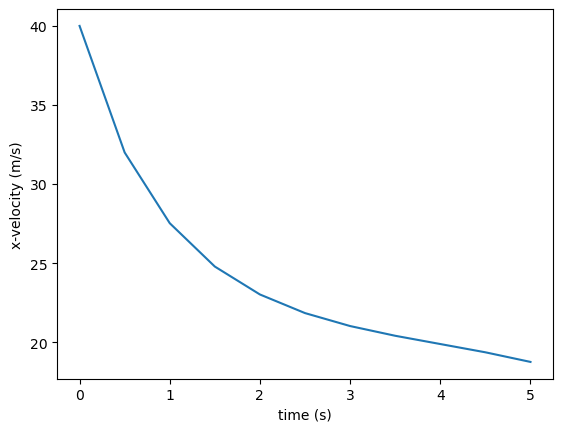

In [19]:
# Use Euler method to update variables
counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # increment by dt and add to the list of time
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # With the new velocity calculate the drag force
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

    # Increment the counter by 1
    counter = counter +1

# Print the values to check
print("t=", t)
print("vx=", vx)

# Let's plot the velocity against time
plt.plot(t,vx)
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")

Position Update

Text(0.5, 0, 'x (m)')

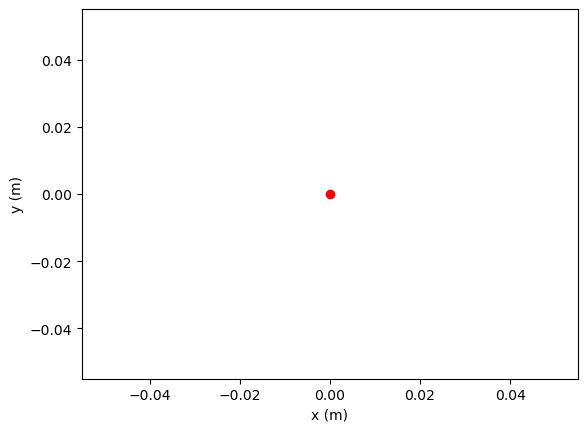

In [29]:
# Initialise the lists for x and y
x = [0]
y = [0]

# Use Euler method to update var
while (counter < 10):
    # Update the positions x and y
    x.append(x[counter]+dt*vx[counter])
    y.append(y[counter]+dt*vy[counter])
    # Increment the counter by 1
    counter = counter +1


# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
# print("Range of projectile is {:3.1f} m".format(x[counter]))

Projectile Simulation

80 60.0
Range of projectile is 174.4 m


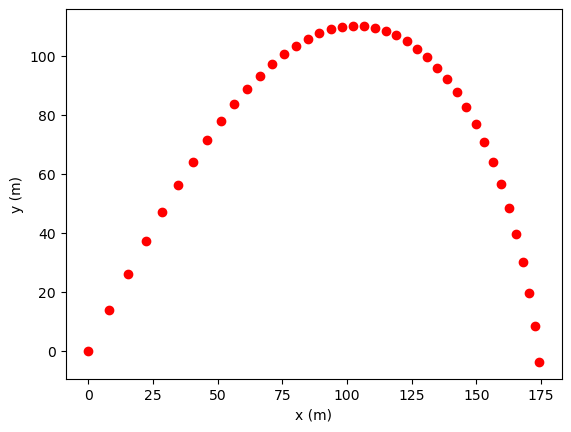

In [30]:
# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time



    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])
    y.append(y[counter]+dt*vy[counter])

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))

    # Increment the counter by 1
    counter = counter +1

# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

# The last value of x should give the range of the projectile approximately.
print("Range of projectile is {:3.1f} m".format(x[counter]))

# 2-DoF Manipulator Dynamical System Build Up
https://sajidnisar.github.io/posts/python_kinematics_dh

In [31]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

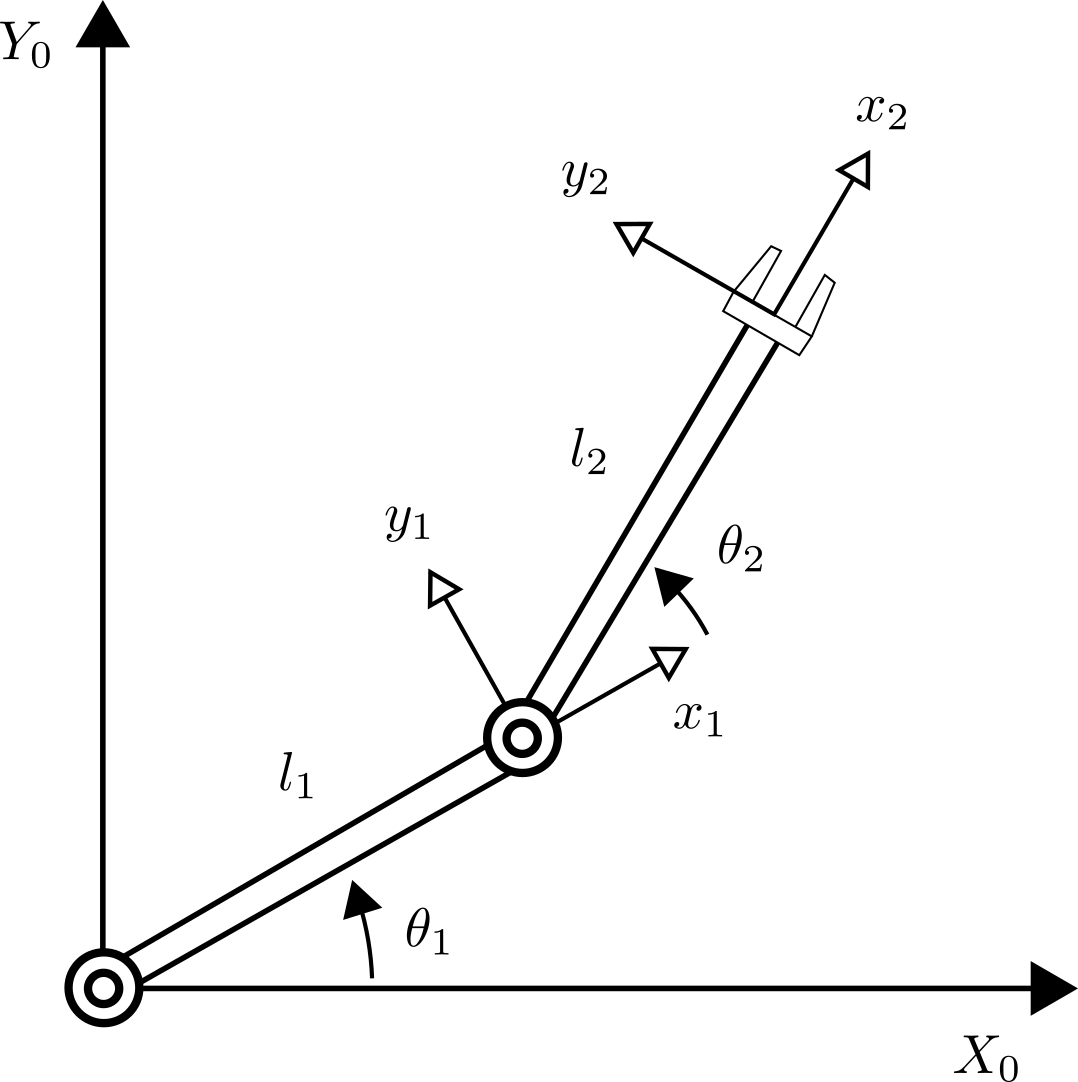

In [38]:
from IPython.display import Image
Image('img.png')

In [39]:
from sympy.physics.mechanics import dynamicsymbols
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d

(theta1, theta2, l1, l2, theta, alpha, a, d)

In [41]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)

In [42]:
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [43]:
m01 = m.subs({alpha:0, a:l1, theta:theta1, d:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [44]:
m12 = m.subs({alpha:0, a:l2, theta:theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [45]:
m02 = (m01*m12)
m02

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0, l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1)],
[                                                 0,                                                  0, 1,                                                                        0],
[                                                 0,                                                  0, 0,                                                                        1]])

In [46]:
mbee= sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), sp.trigsimp(m02[0,3].simplify())],
                 [m02[1,0].simplify(), m02[1,1].simplify(), sp.trigsimp(m02[1,3].simplify())],
                 [m02[2,0].simplify(), m02[2,1].simplify(), m02[2,2].simplify()]])

mbee

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), l1*cos(theta1) + l2*cos(theta1 + theta2)],
[sin(theta1 + theta2),  cos(theta1 + theta2), l1*sin(theta1) + l2*sin(theta1 + theta2)],
[                   0,                     0,                                        1]])

In [47]:
px = mbee[0,2]
px

l1*cos(theta1) + l2*cos(theta1 + theta2)

In [48]:
py = mbee[1,2]
py

l1*sin(theta1) + l2*sin(theta1 + theta2)

In [51]:
fx = sp.lambdify((l1, l2, theta1, theta2), px, 'numpy')
fy = sp.lambdify((l1, l2, theta1, theta2), py, 'numpy')
print("x", fx, "y", fy)

x <function _lambdifygenerated at 0x7fa5e581b400> y <function _lambdifygenerated at 0x7fa5e581aa70>


In [66]:
d2r = np.deg2rad

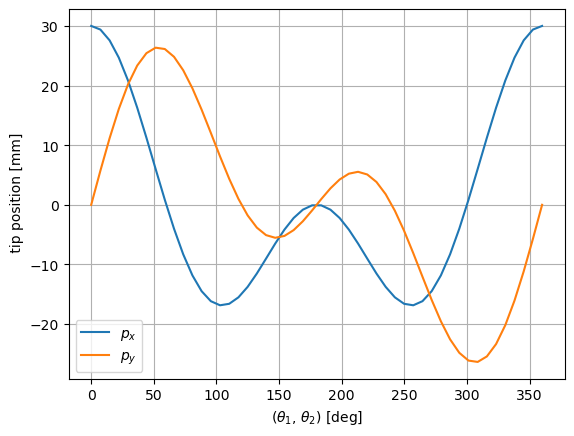

In [69]:
theta1s = np.linspace(np.deg2rad(0), np.deg2rad(360)) # desired range of motion for joint 1
theta2s = np.linspace(np.deg2rad(0), np.deg2rad(360)) # desired range of motion for joint 2

zx = np.array(fx(15.0, 15.0, theta1s, theta2s))
zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

In [57]:
theta11 = np.linspace(d2r(0),d2r(90))
theta22 = np.linspace(d2r(0), d2r(360))
theta1, theta2 = np.meshgrid(theta11, theta22)
l_range = [5] # we can use more than one value here

px1 = {}
py1 = {}
pz1 = {}
for i in l_range:
    l1 = i
    l2 = i - 4

    pxa = l1*np.cos(theta1) + l2*np.cos(theta1 + theta2)
    pya = l1*np.sin(theta1) + l2*np.sin(theta1 + theta2)

    px1['x{0}'.format(i)] = pxa
    py1['x{0}'.format(i)] = pya

In [58]:
pxx = px1['x5']
pyy = py1['x5']
pzz = pyy*0 #dummy zero points for z-axis, as it doesn't exist

In [61]:
trace1 = go.Surface(z=pzz, x=pyy, y=pxx,
                    colorscale='Reds',
                    showscale=False,
                    opacity=0.7,
                   )
data = [trace1]

In [62]:
layout = go.Layout(scene = dict(
                    xaxis = dict(title='X (mm)'),
                    yaxis = dict(title='Y (mm)'),
                    zaxis = dict(title='Z (mm)'),
                    ),
                  )

In [65]:
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

# Deep Q Network

In [ ]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [ ]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))
class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)
    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    def __len__(self):
        return len(self.memory)

In [ ]:
# Get number of actions from gym action space
n_actions = env.n
print("action", n_actions)
# Get the number of state observations
state, info = env.reset()
print("state",state, info)
n_observations = len(state)
print("n observations", n_observations)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)
print("memory", memory)

steps_done = 0